In [96]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [97]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w = np.linalg.solve(tx.T.dot(tx),tx.T.dot(y))
    return w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [98]:
from helpers import *
from grid_search import generate_w, get_best_parameters,grid_search

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    #Get result from least_squares
    ls_w = least_squares(y, tx)
    
    
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = generate_w(num_intervals=50)

    # Start the grid search
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    return ls_w

Test it here

In [99]:
test_your_least_squares()

array([73.293922  , 13.47971243])

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [100]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [101]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    return np.vander(x,degree+1,increasing=True)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [123]:
from costs import compute_loss
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        
        tx = build_poly(x, degree)
            
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        
        weights = least_squares(y, tx)
        
        rmse = np.sqrt(2*compute_loss(x,tx,weights))

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

[ 0.83431835 -0.28976617]
Processing 1th experiment, degree=1, rmse=4.035877289809664
[-0.11521169  1.58466469 -0.76372992  0.08215316]
Processing 2th experiment, degree=3, rmse=4.055133472592267
[ 3.22356472e-01 -4.05990218e-01  1.64303571e+00 -1.12131796e+00
  2.72479696e-01 -2.25108798e-02 -7.79998731e-04  1.53902643e-04]
Processing 3th experiment, degree=7, rmse=4.055692673841536
[ 3.51971548e-01 -4.82755447e-01 -2.73812071e-01  9.42940570e+00
 -2.23220606e+01  2.58172714e+01 -1.77504064e+01  7.74841975e+00
 -2.20006708e+00  4.04810662e-01 -4.65364046e-02  3.03681109e-03
 -8.58642488e-05]
Processing 4th experiment, degree=12, rmse=4.056072102173652


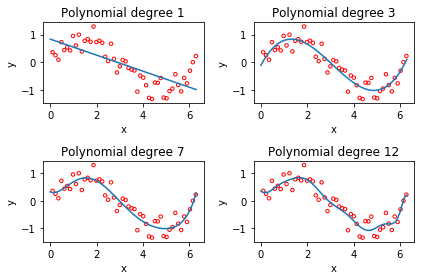

In [124]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [118]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

Then, test your `split_data` function below.

In [121]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    poly_x_tr = build_poly(x_tr, degree)
    poly_x_te = build_poly(x_te, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    weights = least_squares(y_tr, poly_x_tr)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2*compute_loss(y_tr,poly_x_tr,weights))
    rmse_te = np.sqrt(2*compute_loss(y_te,poly_x_te,weights))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [122]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.244, Testing RMSE=0.258
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.277
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.206
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.733


# 3 Ridge Regression
Please fill in the function below.

In [85]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = np.linalg.solve(tx.T.dot(tx) + lambda_*2*tx.shape[0]*np.identity(tx.shape[1]),tx.T.dot(y))
    e = y - tx.dot(w)
    mse = 1/2*np.mean(e**2)
    return mse,w

In [86]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)

    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    
    poly_x_tr = build_poly(x_tr, degree)
    poly_x_te = build_poly(x_te, degree)
    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        
        rmse_tr.append(np.sqrt(2*ridge_regression(y_tr, poly_x_tr, lambda_)[0]))
        rmse_te.append(np.sqrt(2*ridge_regression(y_te, poly_x_te, lambda_)[0]))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.225
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.226
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.226
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.227
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.227
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.228
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.228
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.228
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.228
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.229
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.232
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.241
proportion=0.5, degree=7, lambda=0.193, 

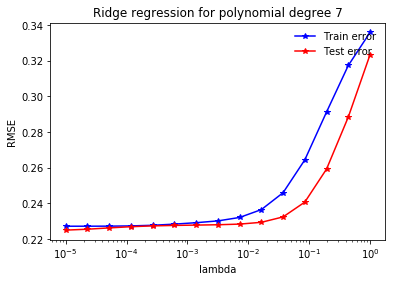

In [87]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)